# Data and Model Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.simplefilter("ignore")

In [2]:
### Import our script
from script_model_predictions import COVID_Predictor

#Set our Predictor object
predictor = COVID_Predictor()

## Import preprocessed data

In [3]:
df = predictor.PreProcessing()

# New confirmed cases (7-day rolling average) by geographical area (continent)

### Sort countries by continent

In [10]:
#Create dictionary
dic_countries = {'Europe' : ['France', 'Italy', 'Spain', 'Portugal', 'Germany', 'Denmark', 'Poland', 'Norway', 'Sweden', 'Finland', 'Russia', 'Greece',
         'Switzerland', 'Belgium', 'Luxembourg', 'Netherlands', 'Slovenia', 'Slovak Republic', 'Hungary', 'Austria', 'Czech Republic', 
         'Albania', 'Romania', 'Moldova', 'Croatia', 'Serbia', 'Bosnia and Herzegovina',
          'Latvia', 'Belarus','Ukraine', 'Kosovo', 'United Kingdom', 'Iceland', 'Ireland', 'Andorra'
         ,'Monaco','Estonia','Lithuania','Bulgaria', 'San Marino', 'Faeroe Islands'],

'Asia' : ['China', 'Timor-Leste', 'South Korea', 'Japan', 'Vietnam', 'Myanmar','Cambodia', 'Laos', 'Thailand', 'India'
       , 'Sri Lanka', 'Bhutan', 'Bangladesh', 'Taiwan', 'Singapore', 'Mongolia', 'Nepal', 'Indonesia', 'Malaysia', 'Philippines', 'Brunei', 'Guam', 'Macao',
          'Hong Kong'],

'Middle_East' : ['Cyprus', 'Turkey', 'Syria', 'Iraq', 'Iran', 'Israel', 'Lebanon', 'Qatar', 'Oman', 'Yemen', 'Jordan',
              'Saudi Arabia', 'Afghanistan', 'United Arab Emirates','Kuwait', 'Kazakhstan', 'Kyrgyz Republic', 'Uzbekistan', 'Pakistan', 'Tajikistan', 'Turkmenistan', 'Georgia',
              'Azerbaijan', 'Palestine', 'Bahrain'],

'South_America' : ['Brazil', 'Uruguay', 'Paraguay', 'Argentina', 'Colombia', 'Venezuela', 'Bolivia', 'Chile', 'Suriname', 'Guyana',
                'Ecuador', 'Aruba', 'Peru'],

'North_America' : ['Costa Rica', 'Panama', 'Honduras', 'Nicaragua', 'Guatemala', 'Mexico', 'United States', 'Cuba', 'Jamaica',
                'Dominican Republic', 'Dominica', 'Puerto Rico', 'United States Virgin Islands', 'Barbados', 'Belize', 'Bahamas', 'Haiti','Bermuda'
                , 'Canada', 'El Salvador', 'Greenland', 'Trinidad and Tobago'],

'Oceania' : ['Australia', 'New Zealand', 'Fiji', 'Vanuatu', 'Solomon Islands', 'Papua New Guinea'],

'Africa' : ['Morocco', 'Algeria', 'Tunisia', 'Libya', 'Egypt', 'South Africa', 'Nigeria', 'Niger', 'Ethiopia', 'Somalia', 'Tanzania',
         'Mozambique', 'Zimbabwe', 'Zambia', 'Angola', 'Namibia', 'Botswana', 'Kenya', 'Sudan', 'Mali', 'Democratic Republic of Congo', 'Congo',
         'Comoros', 'Cape Verde', 'Mauritius', 'Madagascar', "Cote d'Ivoire", 'Cameroon', 'Benin', 'Burkina Faso', 'Togo', 'Chad', 'Djibouti',
         'Rwanda', 'Uganda', 'Burundi', 'Eritrea', 'Liberia', 'Guinea', 'Ghana', 'Gabon', 'Senegal', 'Malawi', 'Mauritania',
         'Eswatini', 'Gambia', 'South Sudan','Lesotho', 'Sierra Leone', 'Seychelles',
 'Central African Republic']}

In [11]:
#Get list of all countries
all_countries = [dic_countries[continent][i] for continent in dic_countries.keys() for i in range(len(dic_countries[continent]))]

#Checking if dataset and dictionnary lists correspond
#list(set(np.asarray(all_countries)) - set(base_df['CountryName'].unique()))


#Search countries indexes by continent
def get_continent_idx(dataset, continent=None):
    list_temp=[]
    for country in dic_countries[continent]:
       #exception for the 3 countries with regions
        if country !='United Kingdom' or country != 'United States':
            list_temp.append(np.where(dataset['CountryName'] == country)[0])    
    return list_temp


#Get countries indexes in the dataframe
europe_idx = get_continent_idx(base_df, continent='Europe')
asia_idx =get_continent_idx(base_df, continent='Asia')
oceania_idx = get_continent_idx(base_df, continent='Oceania')
africa_idx = get_continent_idx(base_df, continent='Africa')
south_america_idx = get_continent_idx(base_df, continent='South_America')
north_america_idx = get_continent_idx(base_df, continent='North_America')
ME_idx = get_continent_idx(base_df, continent='Middle_East')

## Europe

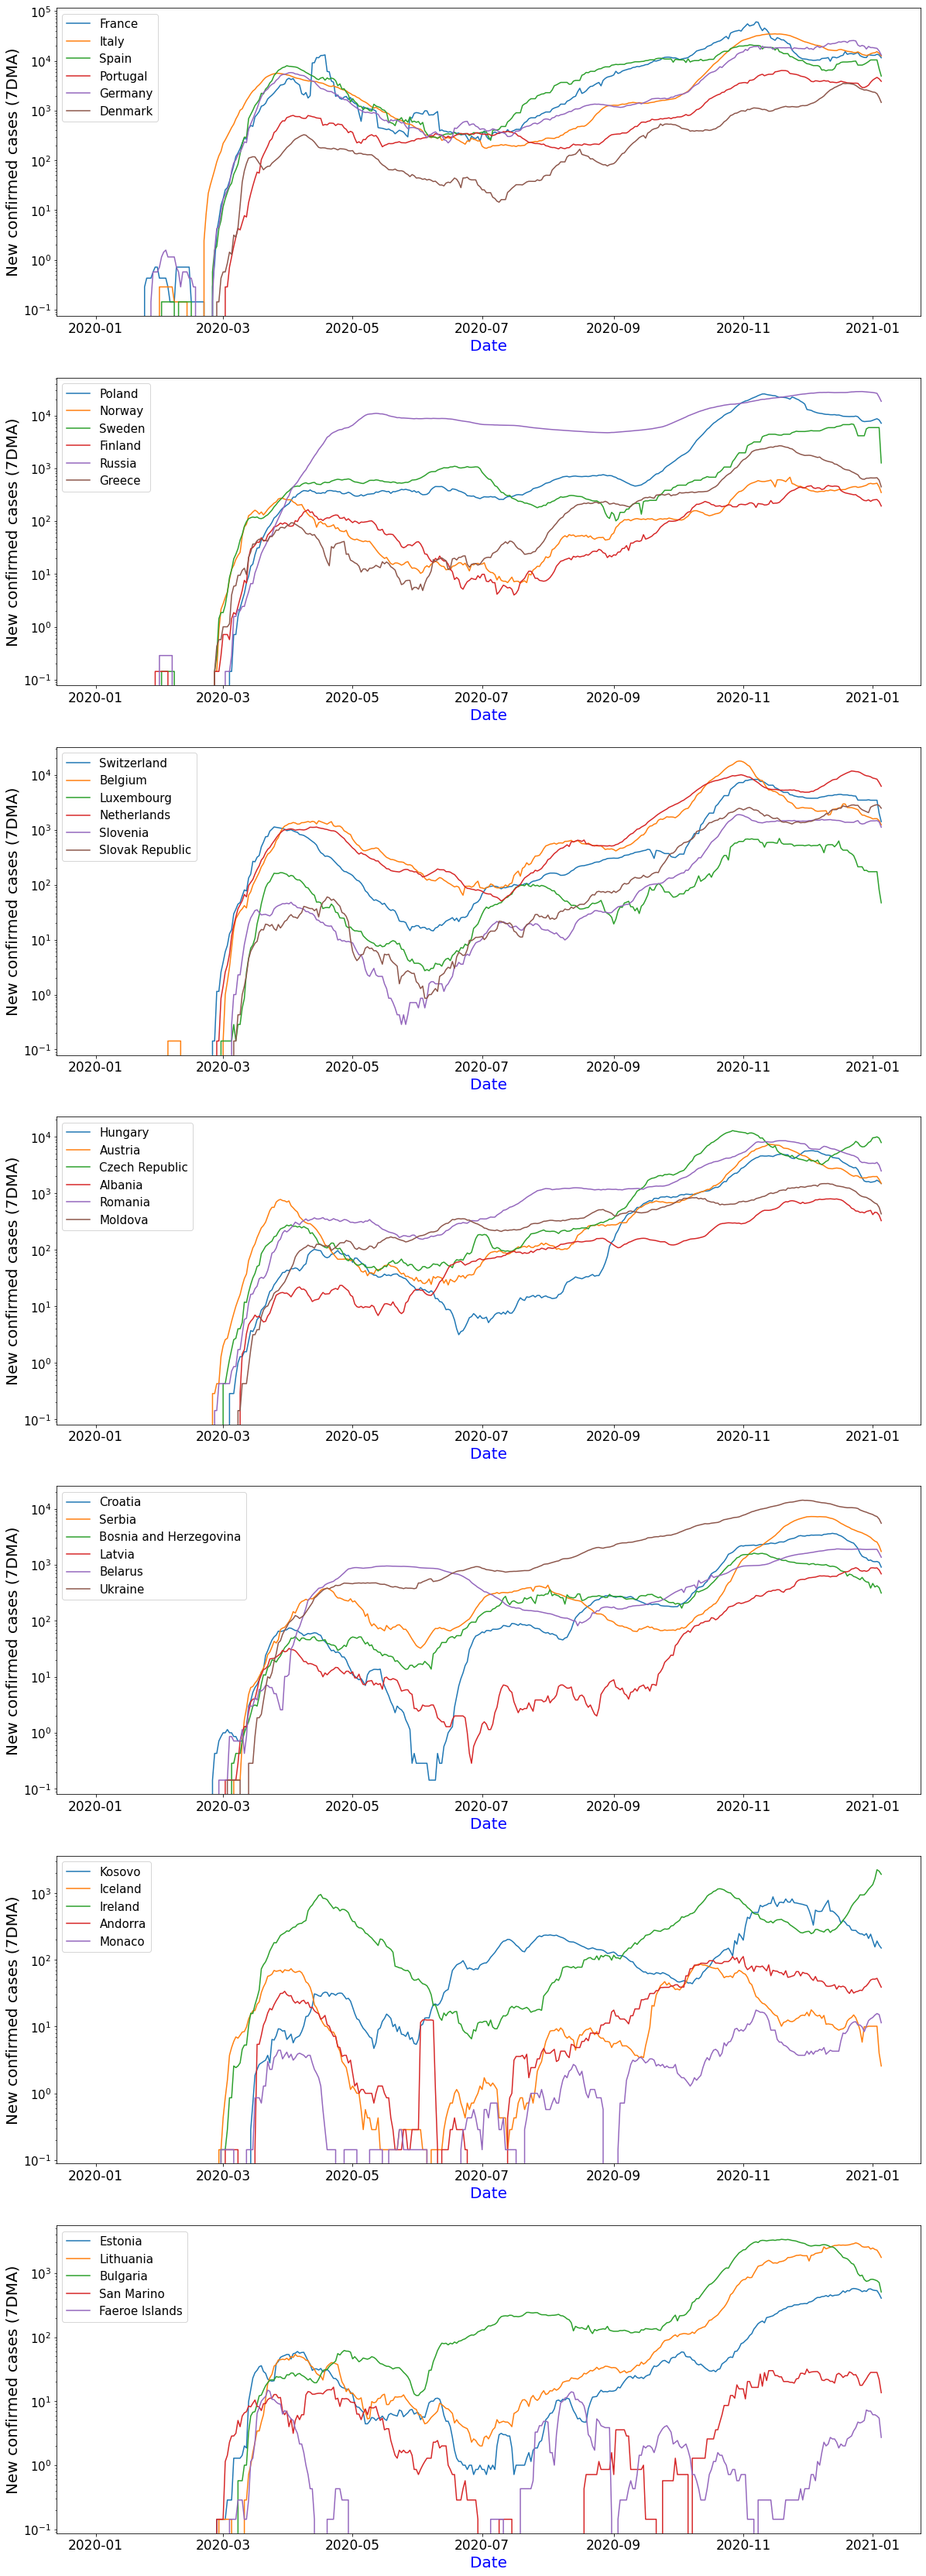

In [14]:
#Plots
plt.figure(figsize=(20,60))
plt.title('Daily change of confirmed cases of covid19 in Europe', size=20)

for i,j in zip(range(0, len(europe_idx), 6), range(1,8)):
    plt.subplot(7,1,int(j))
    for lag in [0,1,2,3,4,5]:
        if i+lag > 40:
                break
        
        if dic_countries['Europe'][i+lag] != 'United Kingdom':
            plt.plot(df['Date'].loc[europe_idx[i+lag][0]:europe_idx[i+lag][-1]], df["NewConfirmedCases_7davg"].loc[europe_idx[i+lag][0]:europe_idx[i+lag][-1]],
                label=dic_countries['Europe'][i+lag])
    plt.ylabel('New confirmed cases (7DMA)', size=20), plt.xlabel('Date', color ='b', size=20)  
    plt.xticks(size=17), plt.yticks(size=15)
    plt.yscale('log')

    plt.legend(loc=2, prop={'size': 15})
plt.show()

## Asia

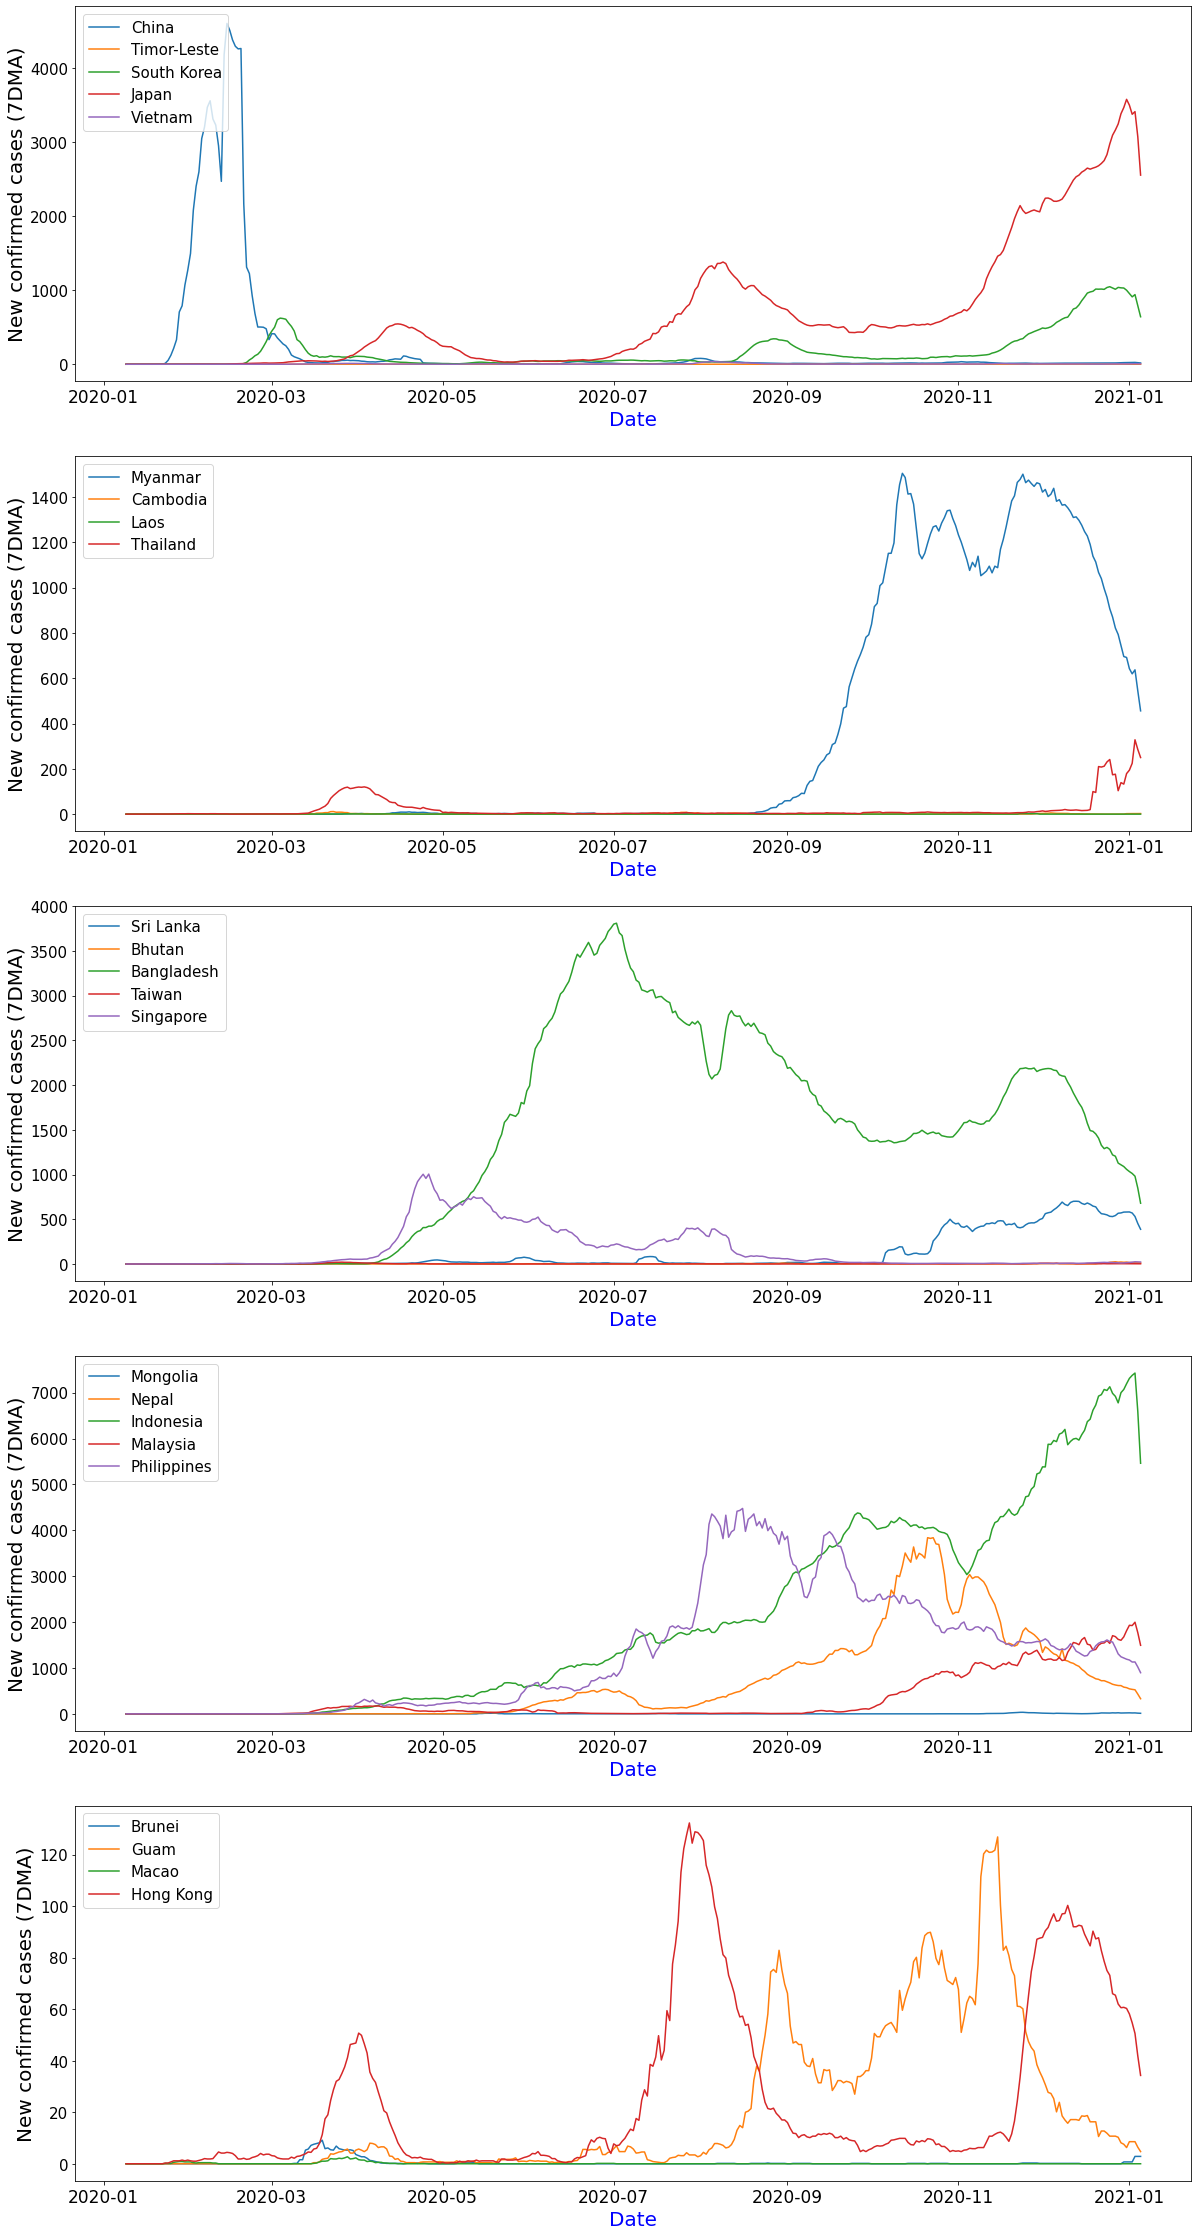

In [16]:
idx = asia_idx
label = 'Asia'

plt.figure(figsize=(20,40))
plt.title('Daily change of confirmed cases of covid19 in Asia', size=20)

for i,j in zip(range(0, len(idx), 5), range(1,6)):
    plt.subplot(5,1,int(j))
    for lag in [0,1,2,3,4]:
        if i+lag > 23:
                break
                
        if dic_countries[label][i+lag] != 'India':
            plt.plot(df['Date'].loc[idx[i+lag][8]:idx[i+lag][-1]], df["NewConfirmedCases_7davg"].loc[idx[i+lag][8]:idx[i+lag][-1]],
                label=dic_countries[label][i+lag])
    plt.ylabel('New confirmed cases (7DMA)', size=20), plt.xlabel('Date', color ='b', size=20)  
    plt.xticks(size=17), plt.yticks(size=15)
    plt.legend(loc=2, prop={'size': 15})
    #plt.yscale('log')

plt.show()

## South America

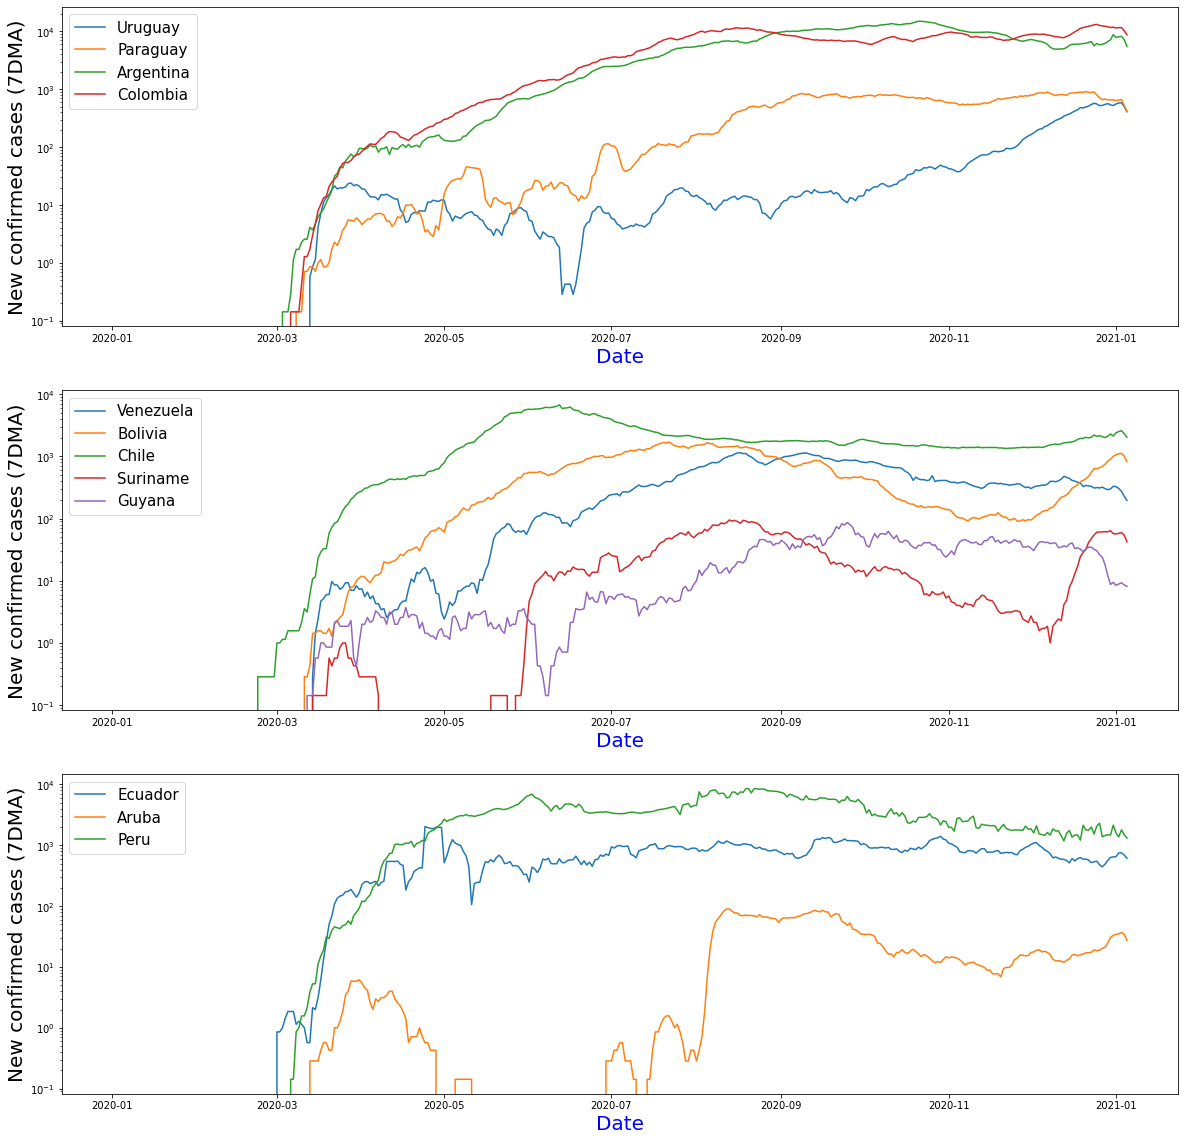

In [18]:
label = 'South_America'
idx = south_america_idx
#Plots
plt.figure(figsize=(20,20))
plt.title('Daily change of confirmed cases of covid19 in South America', size=20)

for i,j in zip(range(0, len(south_america_idx), 5), range(1,4)):
    plt.subplot(3,1,int(j))
    for lag in [0,1,2,3,4,]:
        if i+lag > 12:
                break
                
        if dic_countries[label][i+lag] != 'Brazil':
            plt.plot(df['Date'].loc[idx[i+lag][0]:idx[i+lag][-1]], df["NewConfirmedCases_7davg"].loc[idx[i+lag][0]:idx[i+lag][-1]],
                label=dic_countries[label][i+lag])
    plt.ylabel('New confirmed cases (7DMA)', size=20), plt.xlabel('Date', color ='b', size=20)  
    plt.legend(loc=2, prop={'size': 15})
    plt.yscale('log')

plt.show()

## Middle East

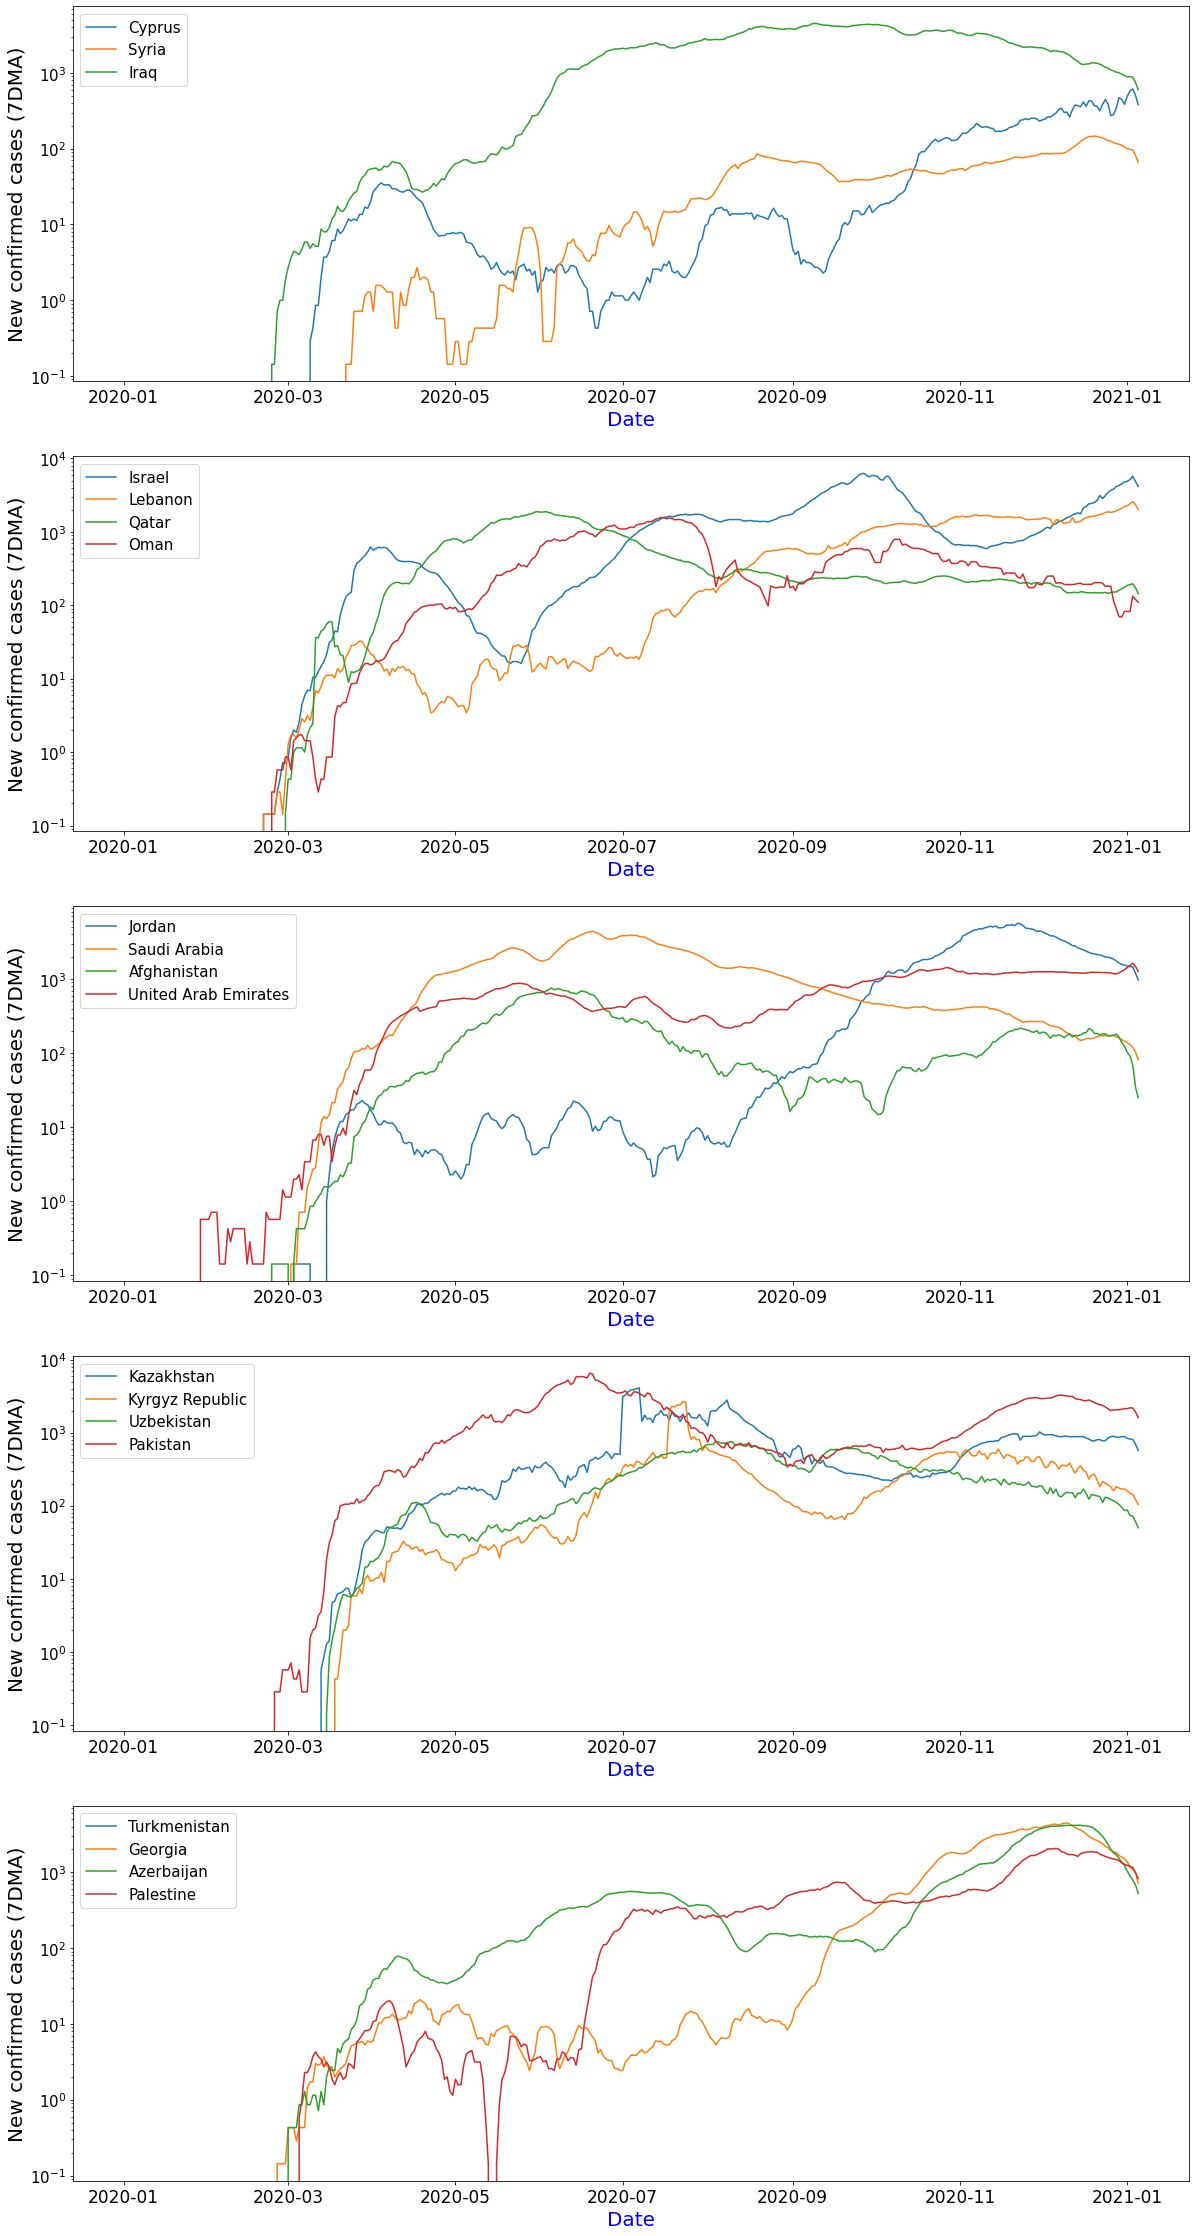

In [19]:
label = 'Middle_East'
idx = ME_idx
plt.figure(figsize=(20,40))
plt.title('Daily change of confirmed cases of covid19 in the Middle East', size=20)

for i,j in zip(range(0, len(idx), 5), range(1,6)):
    plt.subplot(5,1,int(j))
    for lag in [0,1,2,3]:
        if i+lag > 25:
                break
                
        if dic_countries[label][i+lag] != 'Turkey':
            plt.plot(df['Date'].loc[idx[i+lag][0]:idx[i+lag][-1]], df["NewConfirmedCases_7davg"].loc[idx[i+lag][0]:idx[i+lag][-1]],
                label=dic_countries[label][i+lag])
    plt.ylabel('New confirmed cases (7DMA)', size=20), plt.xlabel('Date', color ='b', size=20)  
    plt.xticks(size=17), plt.yticks(size=15)
    plt.yscale('log')

    plt.legend(loc=2, prop={'size': 15})
plt.show()

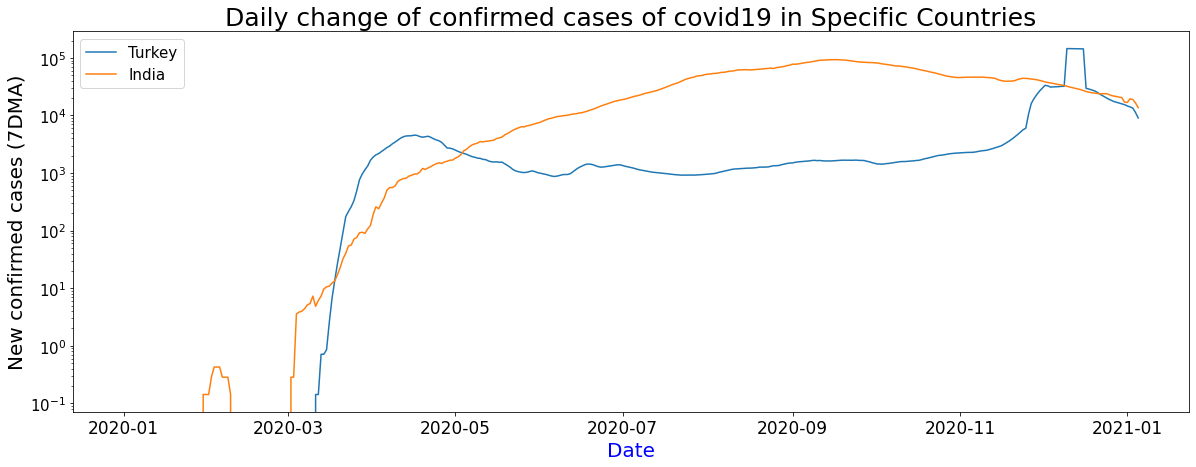

In [23]:
plt.figure(figsize=(20,7))
plt.title('Daily change of confirmed cases of covid19 in Specific Countries', size=25)
idx = ME_idx

country = int(np.where(np.asarray(dic_countries['Middle_East']) == 'Turkey')[0])
country2 = int(np.where(np.asarray(dic_countries['Asia']) == 'India')[0])

plt.plot(df['Date'].loc[idx[country][0]:idx[country][-1]], df["NewConfirmedCases_7davg"].loc[idx[country][0]:idx[country][-1]],
                label='Turkey')
plt.plot(df['Date'].loc[asia_idx[country2][0]:asia_idx[country2][-1]], df["NewConfirmedCases_7davg"].loc[asia_idx[country2][0]:asia_idx[country2][-1]],
                label='India')
plt.ylabel('New confirmed cases (7DMA)', size=20), plt.xlabel('Date', color ='b', size=20)  
plt.xticks(size=17), plt.yticks(size=15)
plt.legend(loc=2, prop={'size': 15})
plt.yscale('log')
plt.show()

# Correlations

In [27]:
MOBILITY_COLUMNS=['retail_and_recreation_percent_change_from_baseline',
        'grocery_and_pharmacy_percent_change_from_baseline',
        'parks_percent_change_from_baseline',
        'transit_stations_percent_change_from_baseline',
        'workplaces_percent_change_from_baseline',
        'residential_percent_change_from_baseline']

#Reduce dataset to get correlations only for NPIS and New Confirmed cases (7DMA)
df_reduced = df.drop(MOBILITY_COLUMNS, axis=1)

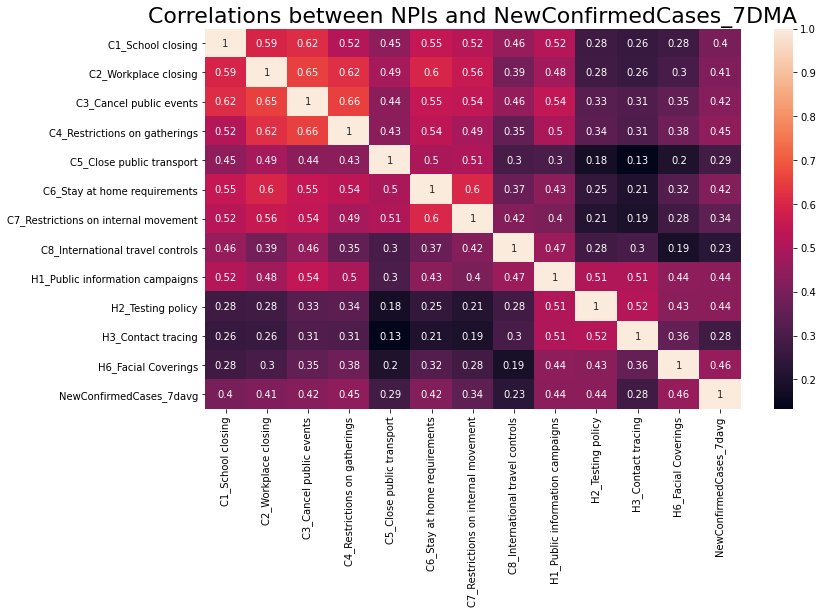

In [37]:
plt.figure(figsize=(12,7))
plt.title("Correlations between NPIs and NewConfirmedCases_7DMA", size=22)
ax = sns.heatmap(df_reduced.corr(method="kendall"), annot=True)

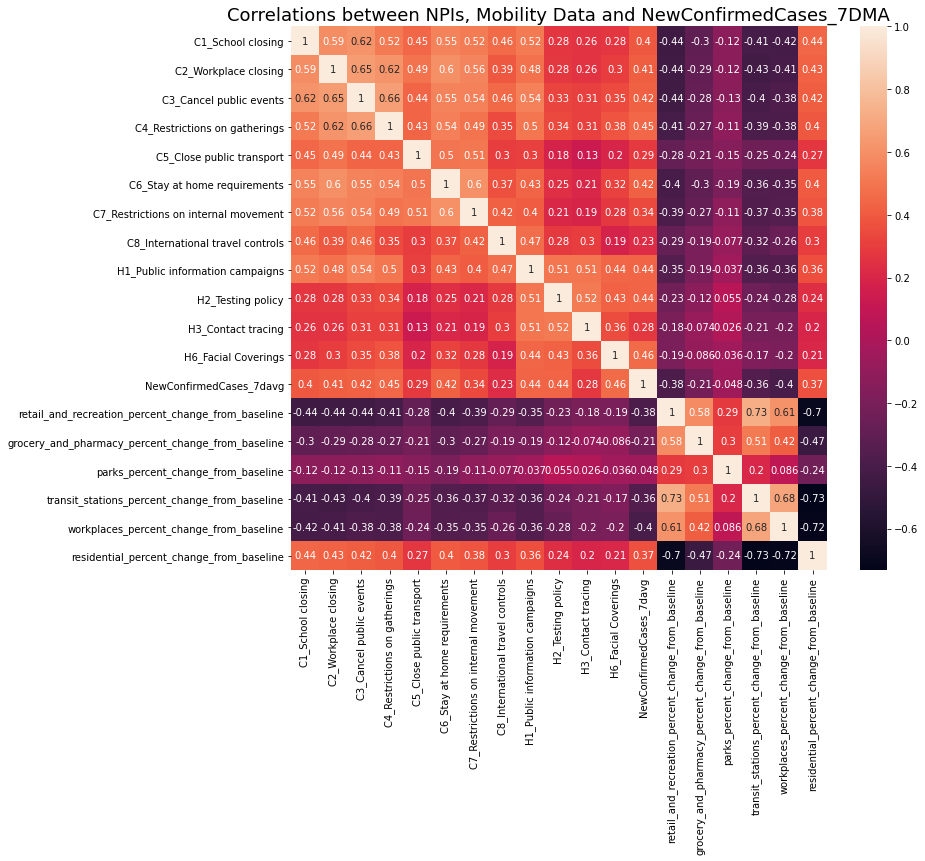

In [46]:
plt.figure(figsize=(12,10))
plt.title("Correlations between NPIs, Mobility Data and NewConfirmedCases_7DMA", size=18)
ax = sns.heatmap(df.corr(method="kendall"), annot=True)

# Correlations between cases today and cases from yesterday

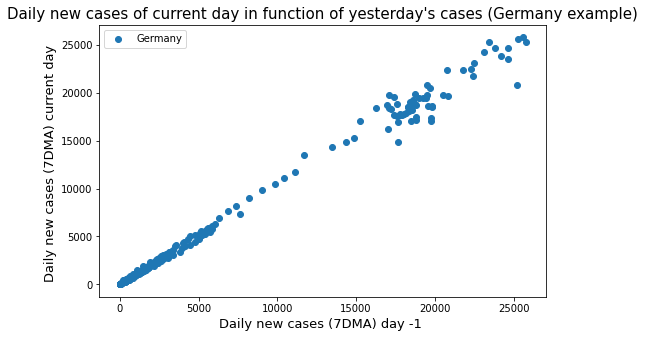

In [21]:
plt.figure(figsize=(8,5))
plt.title("Daily new cases of current day in function of yesterday's cases (Germany example)", size=15)
plt.scatter(list(df[df.GeoID=='Germany'].NewConfirmedCases_7davg.shift(1)), list(df[df.GeoID=='Germany'].NewConfirmedCases_7davg), label='Germany')
plt.xlabel('Daily new cases (7DMA) day -1 ', size=13)
plt.ylabel('Daily new cases (7DMA) current day ', size=13)
plt.legend()
plt.show()

# Clustering

In [ ]:
#Results are not displayed as the clustering took too much time on my CPU. I ran this part on a Kaggle notebook instead.

In [ ]:
from trendypy.trendy import Trendy

#Create list of 7DMA cases for each country
cases_series = []
for country in df.GeoID.unique():
    cases_series.append(df[df.GeoID==country].NewConfirmedCases_7davg)

#Fit the model using DTW and Kmeans
trendy = Trendy(n_clusters=3)
trendy.fit(cases_series)

#Print the labels for each country
for i,j in zip(df.GeoID.unique(), trendy.labels_):
    print('{} : cluster {}'.format(i,j))